<a href="https://colab.research.google.com/github/atulya97/Deep-Learning/blob/master/Digit_MNIST_using_CNN_without_optz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras


In [0]:
tf.random.set_seed(42)
np.random.seed(42)

In [0]:
mnistDB = keras.datasets.mnist


In [4]:
(X_train, y_train),(X_test, y_test) = mnistDB.load_data() #it returns  4 values as two tuples..


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train.reshape((60000, 28, 28, 1)) #1 indicates it is a grey scale ie 1 channel..
X_train = X_train.astype('float32')/255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32')/255

In [0]:
cnn = keras.models.Sequential()

In [0]:
cnn.add(keras.layers.Conv2D(64, (3,3), activation="relu",input_shape=X_train.shape[1:]))

In [0]:
cnn.add(keras.layers.MaxPool2D(2,2))

In [0]:
cnn.add(keras.layers.Conv2D(64, (3,3), activation="relu"))

In [0]:
cnn.add(keras.layers.MaxPool2D(2,2))

In [0]:
cnn.add(keras.layers.Conv2D(64, (3,3), activation="relu"))

In [0]:
cnn.add(keras.layers.Flatten())

In [0]:
cnn.add(keras.layers.Dense(64,activation='relu'))

In [0]:
cnn.add(keras.layers.Dense(10,activation='softmax'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])#rms/adam

In [17]:
history= cnn.fit(x=X_train,y=y_train,validation_split=0.3,epochs=10,batch_size=16)

Epoch 1/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.1442 - accuracy: 0.9561 - val_loss: 0.0872 - val_accuracy: 0.9724
Epoch 2/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 3/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0344 - accuracy: 0.9888 - val_loss: 0.0548 - val_accuracy: 0.9822
Epoch 4/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0549 - val_accuracy: 0.9844
Epoch 5/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0650 - val_accuracy: 0.9836
Epoch 6/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0473 - val_accuracy: 0.9874
Epoch 7/10
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0459 - val_accuracy:

In [18]:
test_loss, test_accuracy = cnn.evaluate(x=X_test, y=y_test)
print(test_loss, test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.9892
0.04594903439283371 0.9891999959945679


In [19]:
print(history)

In [0]:
import matplotlib.pyplot as plt


In [0]:
loss_train=history.history['accuracy']
loss_val=history.history['val_accuracy']



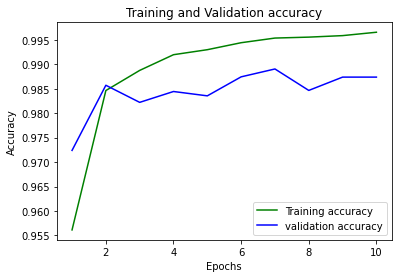

In [22]:
epochs=range(1,11)
plt.plot(epochs,loss_train, 'g' ,label='Training accuracy')
plt.plot(epochs,loss_val,'b',label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()